<a href="https://colab.research.google.com/github/NargisMahtab/Resort-review-analysis/blob/main/resort_test_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/Data Analyst - Test Data - US.csv')

In [ ]:
df.head()

,Review,date,Location
0,I was very impressed with the resort.\n Great ...,2019/08/20,Sebastian
1,The rooms were nice the outside needs work als...,2019/08/20,Los Angeles
2,Great location! I have stayed at this hotel on...,2019/08/20,Georgia
3,The hotel was adequate for my stay. The strips...,2019/08/20,NaN
4,"Great location, room was large and spacious. P...",2019/08/19,Palm Harbor


In [ ]:
df.tail()

,Review,date,Location
6443,"·the staff were all so friendly. frank, the ch...",2019/07/12,United States of America
6444,·the internet barely worked or didn't work,2019/07/12,United States of America
6445,·the location was great.\n \n \n \n \n ·the be...,2019/07/10,United States of America
6446,·we were early for check in and the staff was ...,2019/07/10,United States of America
6447,"·staff, free coffee, location and activities.\...",2019/07/10,United States of America


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6448 entries, 0 to 6447
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Review    6393 non-null   object
 1   date      6448 non-null   object
 2   Location  1711 non-null   object
dtypes: object(3)
memory usage: 151.2+ KB


In [ ]:
df.shape

(6448, 3)

In [ ]:
df.describe()

,Review,date,Location
count,6393,6448,1711
unique,6384,403,1082
top,Amazing\n \n Read more\n Read less,Jun 2019,United States of America
freq,4,145,116


In [ ]:
df.duplicated().sum()

4

In [ ]:
df = df.drop_duplicates()

In [ ]:
df.isnull().sum()

Review        51
date           0
Location    4733
dtype: int64

In [ ]:
df = df.dropna(subset=['Review'])

In [ ]:
df.isnull().sum()

Review         0
date           0
Location    4688
dtype: int64

In [ ]:
df = df.fillna('Unknown')

In [ ]:
df.isnull().sum()

Review      0
date        0
Location    0
dtype: int64

In [ ]:
df.shape

(6393, 3)

In [ ]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [ ]:
import string
import re

from nltk.corpus import stopwords

# Download stopwords if not already downloaded
nltk.download('stopwords')

# Define a function to clean text
def clean_text(text):
    # Convert text to lowercase
    text = text.lower()

    # Remove punctuation
    text = ''.join([char for char in text if char not in string.punctuation])

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    words = text.split()
    words = [word for word in words if word not in stop_words]

    # Join the cleaned words back into a single string
    cleaned_text = ' '.join(words)

    return cleaned_text

# Apply the clean_text function to the 'review_text' column
df['cleaned_review'] = df['Review'].apply(clean_text)

df['cleaned_review'] = df['cleaned_review'].apply(lambda x:re.sub('@[^\s]+','',x))
df['cleaned_review'] = df['cleaned_review'].apply(lambda x:re.sub(r'\B#\S+','',x))
df['cleaned_review'] = df['cleaned_review'].apply(lambda x:re.sub(r"http\S+", "", x))
df['cleaned_review'] = df['cleaned_review'].apply(lambda x:' '.join(re.findall(r'\w+', x)))
df['cleaned_review'] = df['cleaned_review'].apply(lambda x:re.sub(r'\s+[a-zA-Z]\s+', '', x))
df['cleaned_review'] = df['cleaned_review'].apply(lambda x:re.sub(r'\s+', ' ', x, flags=re.I))


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
df.head()

,Review,date,Location,cleaned_review
0,I was very impressed with the resort.\n Great ...,2019/08/20,Sebastian,impressed resort great staff main resort pool ...
1,The rooms were nice the outside needs work als...,2019/08/20,Los Angeles,rooms nice outside needs work also free breakf...
2,Great location! I have stayed at this hotel on...,2019/08/20,Georgia,great location stayed hotel last three trips n...
3,The hotel was adequate for my stay. The strips...,2019/08/20,Unknown,hotel adequate stay strips bathtub useless fel...
4,"Great location, room was large and spacious. P...",2019/08/19,Palm Harbor,great location room large spacious parking eas...


In [ ]:
sia = SentimentIntensityAnalyzer()

def categorize_sentiment(sentiment_value):
    if sentiment_value < 0:
        return 'Negative'
    elif 0 <= sentiment_value <= 0.5:
        return 'Neutral'
    else:
        return 'Positive'

df['sentiment_score'] = df['cleaned_review'].apply(lambda x: sia.polarity_scores(x)['compound'])
df['sentiment'] = df['sentiment_score'].apply(categorize_sentiment);

In [ ]:
df.head()

,Review,date,Location,cleaned_review,sentiment_score,sentiment
0,I was very impressed with the resort.\n Great ...,2019/08/20,Sebastian,impressed resort great staff main resort pool ...,0.9325,Positive
1,The rooms were nice the outside needs work als...,2019/08/20,Los Angeles,rooms nice outside needs work also free breakf...,0.8779,Positive
2,Great location! I have stayed at this hotel on...,2019/08/20,Georgia,great location stayed hotel last three trips n...,0.6249,Positive
3,The hotel was adequate for my stay. The strips...,2019/08/20,Unknown,hotel adequate stay strips bathtub useless fel...,0.1779,Neutral
4,"Great location, room was large and spacious. P...",2019/08/19,Palm Harbor,great location room large spacious parking eas...,0.9260,Positive


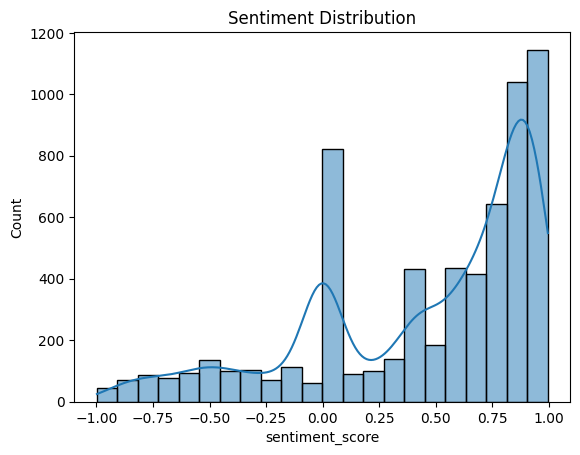

In [ ]:
sns.histplot(data=df, x='sentiment_score', kde=True)
plt.title('Sentiment Distribution')
plt.show()

In [ ]:
df['sentiment'].value_counts()

Positive    3761
Neutral     1684
Negative     948
Name: sentiment, dtype: int64

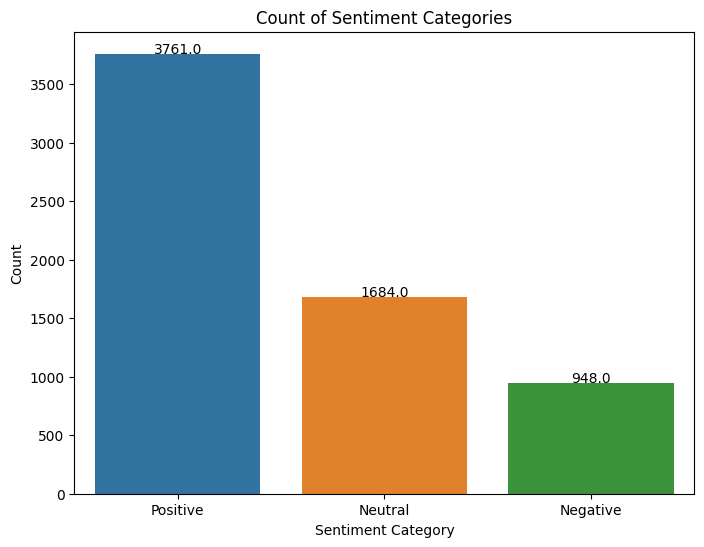

In [ ]:
plt.figure(figsize=(8, 6))
ax = sns.countplot(data=df, x='sentiment')

# Add values on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='baseline')

plt.title('Count of Sentiment Categories')
plt.xlabel('Sentiment Category')
plt.ylabel('Count')
plt.show()

In [ ]:
location_counts = df['Location'].value_counts().iloc[1:]
top10_location = location_counts.head(10)
top10_location

United States of America    116
New York                     34
California                   19
San Jose                     19
Canada                       16
Florida                      16
United Kingdom               14
New York, NY                 13
Toronto                      12
Miami                        12
Name: Location, dtype: int64

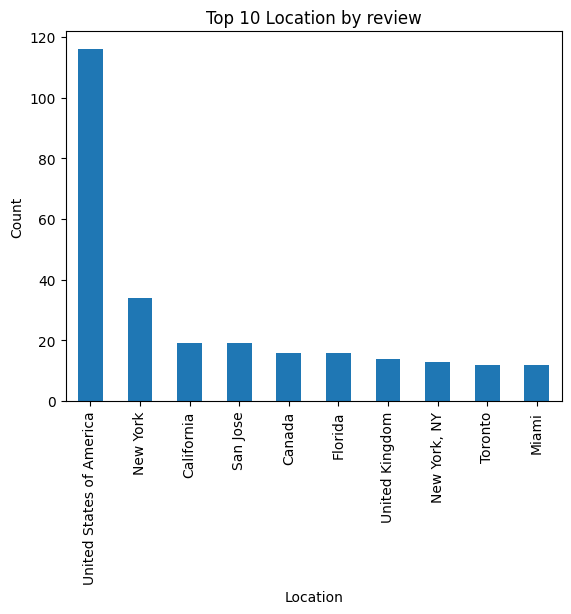

In [ ]:
top10_location.plot(kind='bar')
plt.xlabel('Location')
plt.ylabel('Count')
plt.title('Top 10 Location by review')
plt.xticks(rotation = 90)
plt.show()

In [ ]:
df['date'] = pd.to_datetime(df['date'])

In [ ]:
monthly_review_count = df.set_index('date')['cleaned_review'].resample('M').count()
monthly_mean_sentiment = df.set_index('date')['sentiment_score'].resample('M').mean()


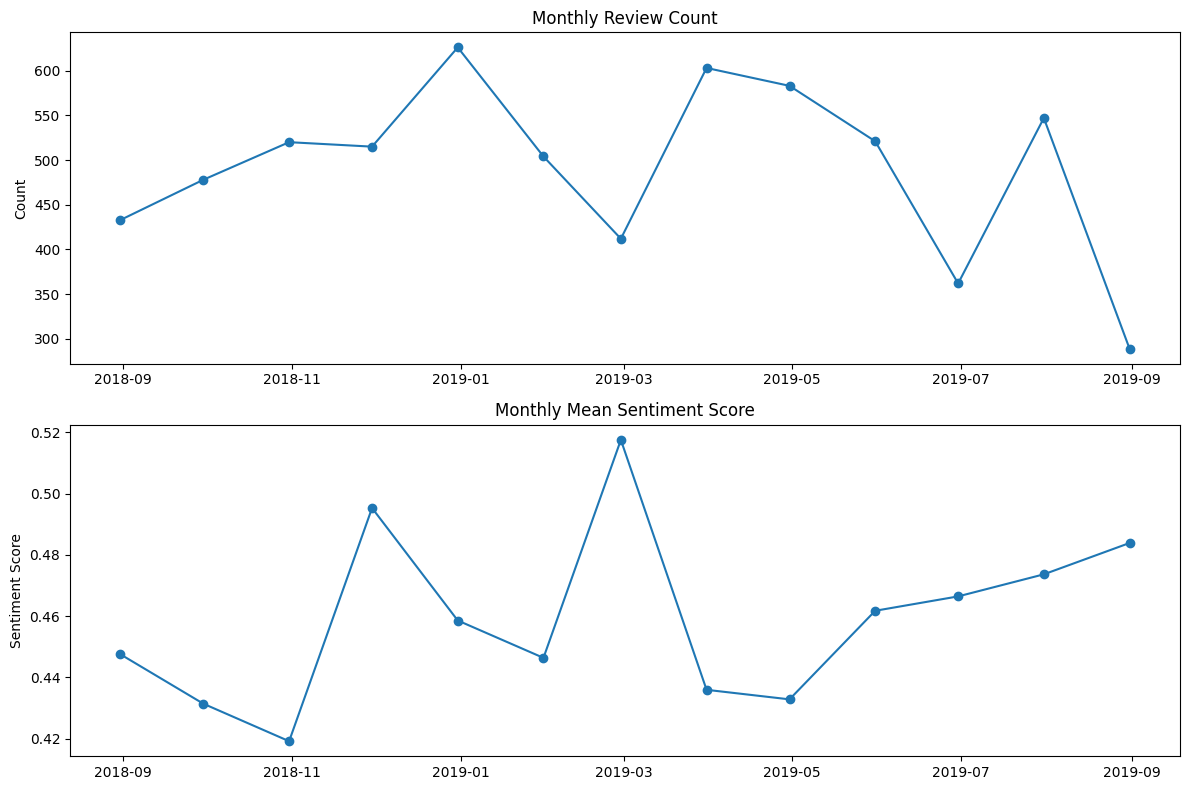

In [ ]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))

# Plot monthly review count
ax1.plot(monthly_review_count.index, monthly_review_count.values, marker='o', linestyle='-')
ax1.set_title('Monthly Review Count')
ax1.set_ylabel('Count')

# Plot monthly mean sentiment score
ax2.plot(monthly_mean_sentiment.index, monthly_mean_sentiment.values, marker='o', linestyle='-')
ax2.set_title('Monthly Mean Sentiment Score')
ax2.set_ylabel('Sentiment Score')

# Adjust layout
plt.tight_layout()
plt.show()

In [ ]:
date_distribution = df['date'].value_counts().sort_index()
date_distribution

2018-08-01    64
2018-08-02     7
2018-08-03    11
2018-08-04     7
2018-08-05    12
              ..
2019-08-16     6
2019-08-17    14
2019-08-18    13
2019-08-19    20
2019-08-20     4
Name: date, Length: 385, dtype: int64

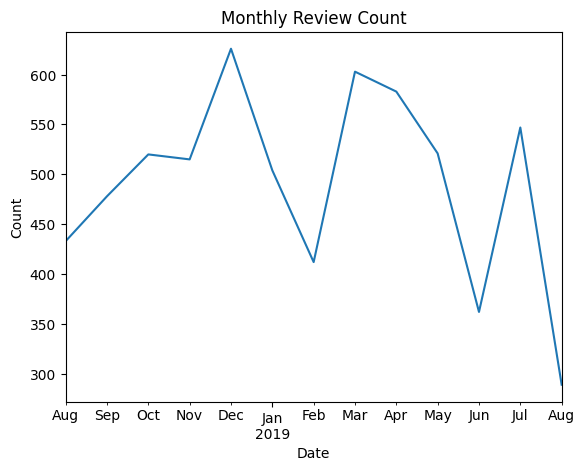

In [ ]:
df.set_index('date')['cleaned_review'].resample('M').count().plot(title='Monthly Review Count')
plt.xlabel('Date')
plt.ylabel('Count')
plt.show()

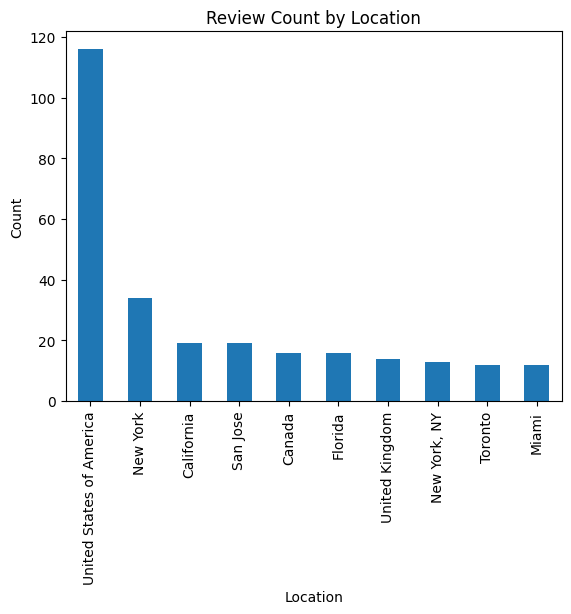

In [ ]:
top10_location.plot(kind='bar', title='Review Count by Location')
plt.xlabel('Location')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

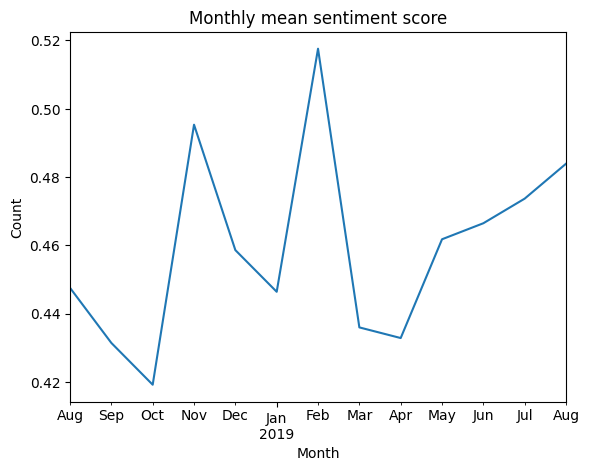

In [ ]:
df.set_index('date')['sentiment_score'].resample('M').mean().plot(title='Monthly mean sentiment score')
plt.xlabel('Month')
plt.ylabel('Count')
plt.show()